# Visualization with Python


# `matplotlib`
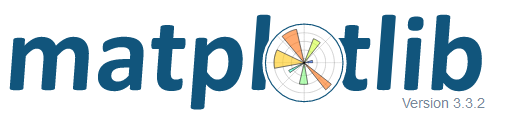


https://matplotlib.org/

In [1]:
import pandas as pd

## equivalent to %pylab inli ne
import matplotlib.pyplot as plt
import numpy as np


## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

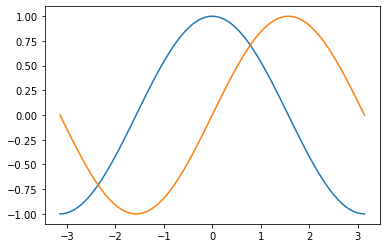

In [2]:
X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

#### Exercise - 1 

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


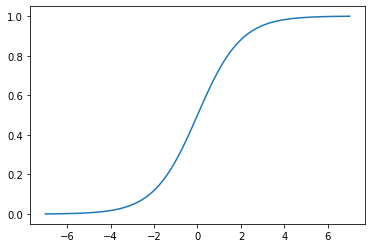

In [ ]:
X=np.linspace(-7,7,100)
Y=np.exp(X)/(1+np.exp(X))
plt.plot(X,Y)

### Scatter plots

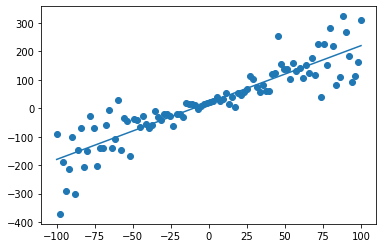

In [3]:
X=np.linspace(-100,100,100)
jitter=X*np.random.randn(100)
Y=20+2*X

Y_rand=Y+jitter
plt.plot(X,Y)
plt.scatter(X,Y_rand)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


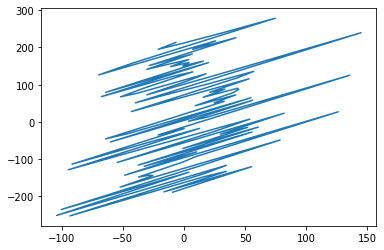

In [ ]:
jitter=50*np.random.randn(100)
Y_rand=Y+jitter

plt.plot(jitter,Y_rand)
plt.scatter(jitter,Y_rand)

This is what happens if you make a line plot of unsorted data:

#### Exercise - 2

Let's draw a circle using a scatter plot:

$$x=r \cdot cos(\phi)$$
$$y=r \cdot sin(\phi)$$


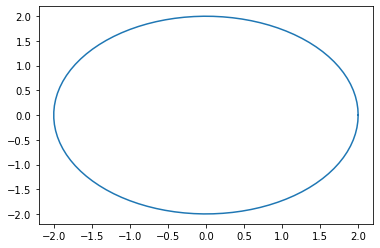

In [11]:
n_resolution = 100
angle=np.pi/180.0*np.linspace(0,360,n_resolution)
radius=2

X=radius*np.cos(angle)
Y=radius*np.sin(angle)
plt.plot(X,Y)

### Bar plots

Do not confuse with histograms

A bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.


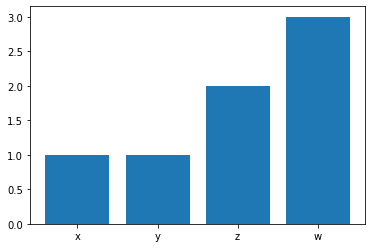

In [19]:
x=[1,1,2,3]
Y=['x','y','z','w']

#plt.bar(range(len(x)),x)
plt.bar(Y,x)
plt.xticks(range(len(x)),Y);

How to make it horizontal?

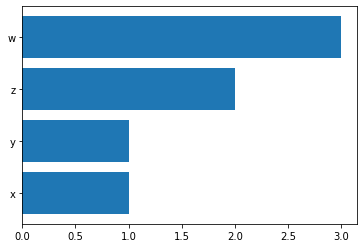

In [24]:
#plt.bar(range(len(x)),x)
plt.barh(Y,x)
plt.yticks(range(len(x)),Y);

#### Histogram
A histogram is an approximate representation of the distribution of numerical data.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size

[Wikipedia](https://en.wikipedia.org/wiki/Histogram)


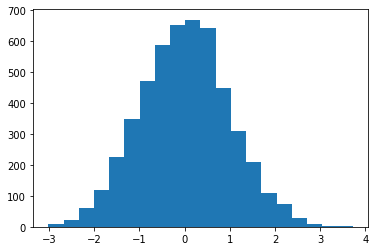

In [32]:
X_normal=np.random.normal(size=5000)
plt.hist(X_normal,bins=20);

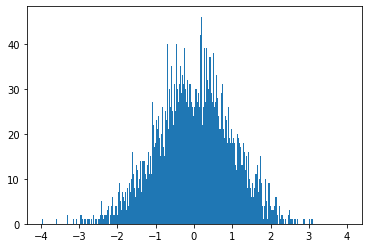

In [ ]:
plt.hist(X_normal,bins=500);

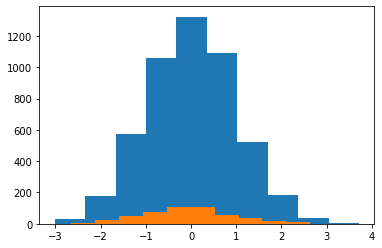

In [37]:
plt.hist(X_normal,density=False);
X_bis=np.random.normal(size=500)
plt.hist(X_bis,density=False);


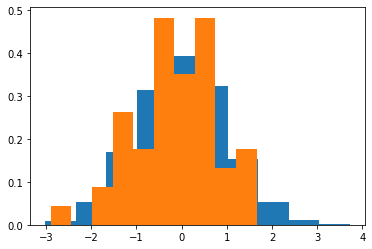

In [38]:
plt.hist(X_normal,density=True);
X_bis=np.random.normal(size=50)

plt.hist(X_bis,density=True);


## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.
Is the object that keeps the whole image output.



In [39]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

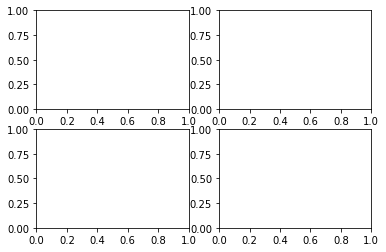

In [40]:
fig,ax=plt.subplots(2,2)

In [41]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis` of a single plot. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.




### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

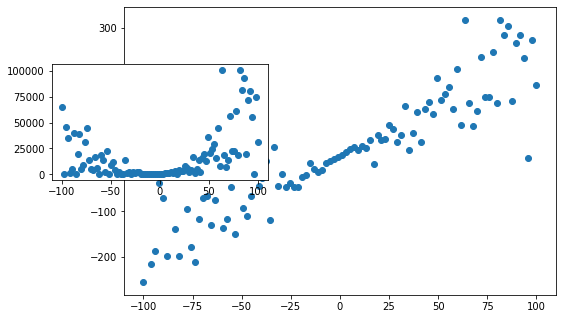

In [43]:
X=np.linspace(-100,100,100)
jitter=X*np.random.randn(100)
Y=20+2*X

Y_rand=Y+jitter

figure=plt.figure(figsize=(10,8))
axes=figure.add_axes([0.2,0.4,0.6,0.5])
axes.scatter(X,Y_rand)

axes2=figure.add_axes([0.1,0.6,0.3,0.2])
axes2.scatter(X,Y_rand**2)


### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

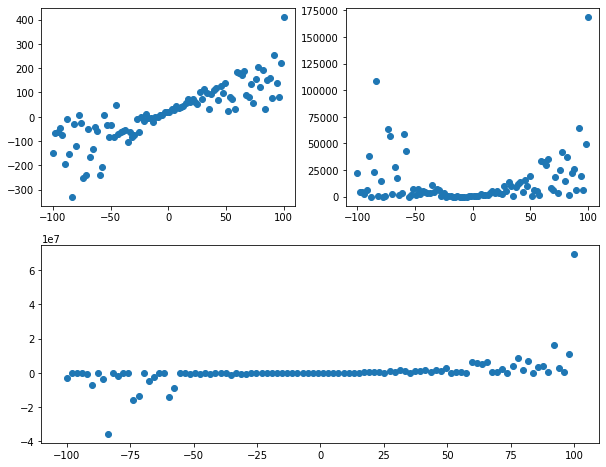

In [44]:
X=np.linspace(-100,100,100)
jitter=X*np.random.randn(100)
Y=20+2*X

Y_rand=Y+jitter

figure=plt.figure(figsize=(10,8))
subplot_1=figure.add_subplot(2,2,1)
subplot_1.scatter(X,Y_rand)


subplot_2=figure.add_subplot(2,2,2)
subplot_2.scatter(X,Y_rand**2)

subplot_3=figure.add_subplot(2,1,2)
subplot_3.scatter(X,Y_rand**3)

### `figure.subplots()`


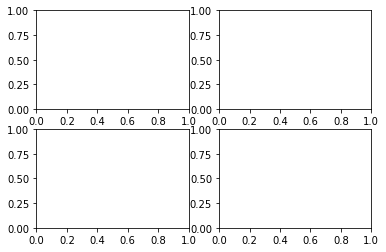

In [ ]:
figure,axes=plt.subplots(2,2)


In [ ]:
type(axes)

numpy.ndarray

In [ ]:
axes.shape

(2, 2)

This is probably the most comfortable way of working with the object-oriented interface 

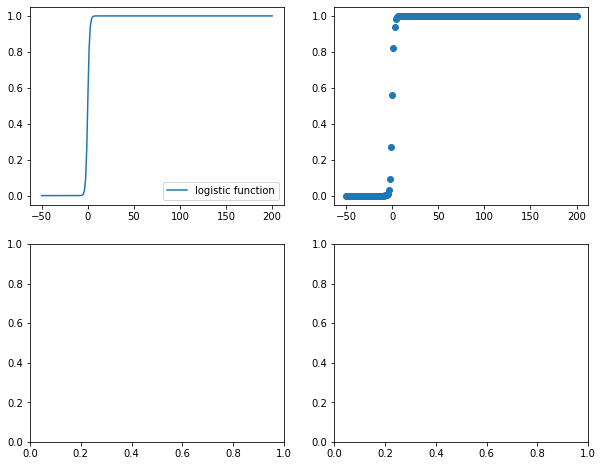

In [45]:
figure,axes=plt.subplots(2,2,figsize=(10,8))

x=np.linspace(-50,200,200)
y=1/(1+np.exp(-x))
axes[0,0].plot(x,y)
axes[0,1].scatter(x,y)
axes[0,0].legend(['logistic function'])

### Sharing axis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


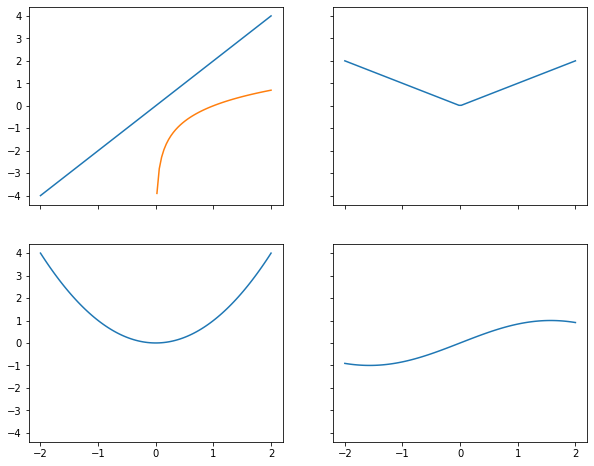

In [ ]:
X=np.linspace(-2,2,100)

figure,axes_array=plt.subplots(2,2,figsize=(10,8),sharey=True,sharex=True)
axes_array[0,0].plot(X,2*X)
axes_array[0,0].plot(X,np.log(X));

axes_array[0,1].plot(X,np.abs(X));

axes_array[1,0].plot(X,X**2);

axes_array[1,1].plot(X,np.sin(X));

two different Y axis

/Users/tonialmagro/opt/anaconda3/envs/cds/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


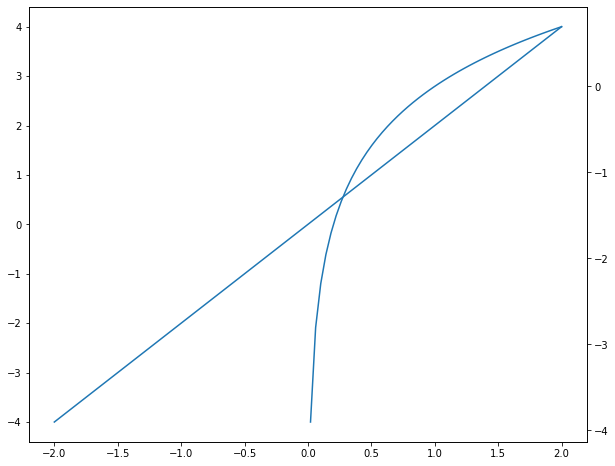

In [46]:
X=np.linspace(-2,2,100)

fig,ax=plt.subplots(figsize=(10,8))
ax2=ax.twinx() 

ax.plot(X,2*X)
ax2.plot(X,np.log(X));

#### Gridspec


## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

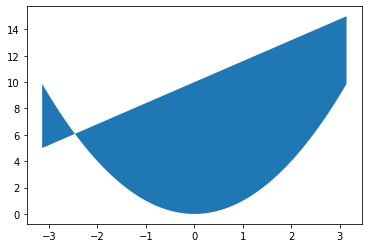

In [47]:
X=np.linspace(-np.pi,np.pi,300)
Y1=np.linspace(5,15,300)
Y2=X**2

plt.fill_between(X,Y1,X**2)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

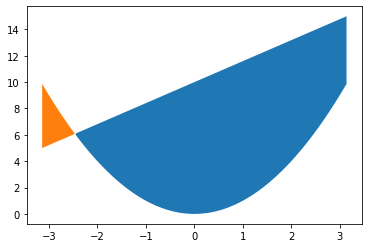

In [ ]:
X=np.linspace(-np.pi,np.pi,300)
Y1=np.linspace(5,15,300)
Y2=X**2

plt.fill_between(X,Y1,X**2,where=Y1>Y2)

plt.fill_between(X,Y1,X**2,where=Y1<Y2)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

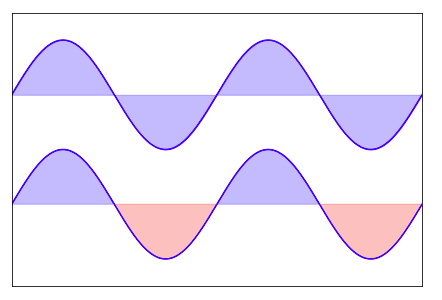



([], [])

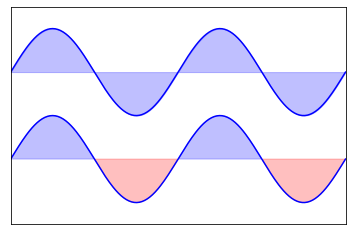

In [48]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)
 
plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X,Y+1,1,color='blue',alpha=0.25)


plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X,Y-1,-1,where=(Y-1)>-1,color='blue',alpha=0.25)
plt.fill_between(X,Y-1,-1,where=(Y-1)<=-1,color='red',alpha=0.25)

plt.xlim(-np.pi,np.pi)
plt.xticks([])
plt.ylim(-2.5,2.5)
plt.yticks([])

## Line properties


### Color



In [49]:
X=np.linspace(0,10,1000)

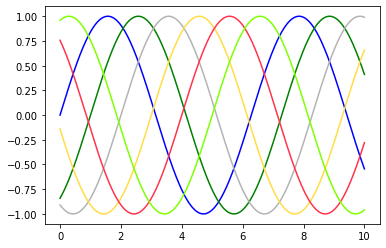

In [50]:
plt.plot(X,np.sin(X-0),color='blue')
plt.plot(X,np.sin(X-1),color='g')
plt.plot(X,np.sin(X-2),color='0.7')
plt.plot(X,np.sin(X-3),color='#FFDD44')
plt.plot(X,np.sin(X-4),color=(1.0,0.2,0.3)) #RGB
plt.plot(X,np.sin(X-5),color='chartreuse') #HTML

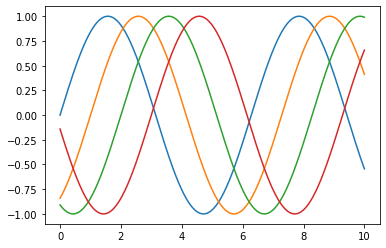

In [51]:
plt.plot(X,np.sin(X-0))
plt.plot(X,np.sin(X-1))
plt.plot(X,np.sin(X-2))
plt.plot(X,np.sin(X-3))


See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

In [56]:
from matplotlib import cm

color_map=cm.get_cmap('magma')

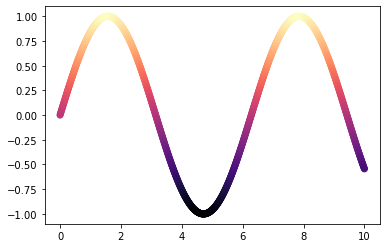

In [65]:
plt.scatter(X,np.sin(X),c=np.sin(X),cmap=color_map)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

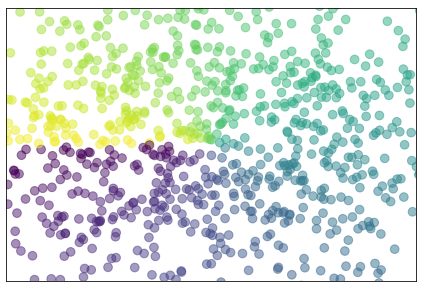

(-1.5, 1.5)

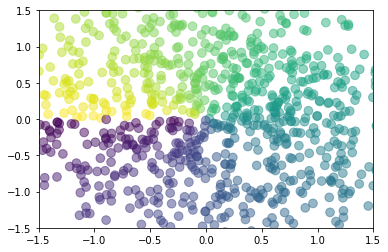

In [66]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

T=np.arctan2(Y,X)
plt.scatter(X,Y,s=75,c=T,alpha=.5)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

### Markers and linestyles

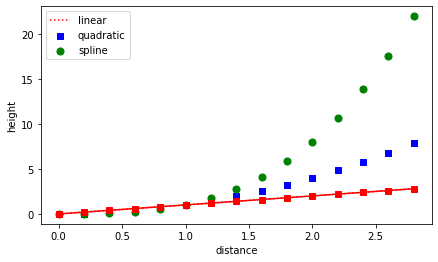

In [88]:
fig,ax=plt.subplots(figsize=(7,4))

X=np.arange(0,3,0.2)
Y1=X
Y2=X**2
Y3=X**3
#ax.plot(X,Y1,c='r',ls='--')
ax.plot(X,Y1,'rs-')
ax.plot(X,Y1,linestyle='dotted',color='red',label='linear')
ax.scatter(X,Y2,color='blue',marker='s',label='quadratic')
ax.scatter(X,Y3,color='g',marker='o',s=50,label='spline')
#plt.xlabel('distance')
ax.set_xlabel('distance')
#plt.ylabel('height')
ax.set_ylabel('height')
plt.legend()


While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



Esto es una fórmula:
$$f(x,a) = \frac{x^{2a}}{3}$$

Esto es una expresión inline $\sqrt{3}$.

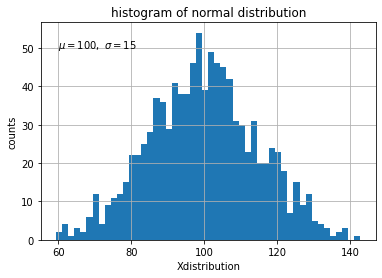

In [89]:
mu,sigma=100,15
x=mu+sigma*np.random.randn(1000)

plt.hist(x,bins=50);
plt.xlabel('Xdistribution')
plt.ylabel('counts')
plt.title('histogram of normal distribution')
plt.grid(True)
plt.text(60,50,'$\mu=100,\ \sigma=15$');


[Different font families](https://www.oreilly.com/library/view/matplotlib-2x-by/9781788295260/9af01705-e09c-4d1e-a036-ca0260d5003b.xhtml).



*  'serif': Serifs are small decorative flourishes attached to stroke ends of characters. Fonts such as Times New Roman, Century, Garamond, and Palatino are serif fonts.
*  'sans-serif': This means without serif. Fonts such as Helvetica, Arial, Calibri, and DejaVu Sans are sans-serif.
*  'monospace': Monospace fonts have characters of the same width. They are usually used for code.
* 'cursive': Cursive features connected brush strokes, usually in italic, that give a sense of classical elegance.
* 'fantasy': Decorative fonts that look funny.



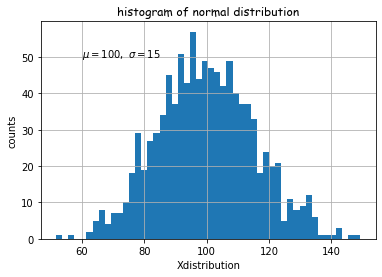

In [90]:
mu,sigma=100,15
x=mu+sigma*np.random.randn(1000)

plt.hist(x,bins=50);
plt.xlabel('Xdistribution')
plt.ylabel('counts')
plt.title('histogram of normal distribution',fontfamily='fantasy')
plt.grid(True)
plt.text(60,50,'$\mu=100,\ \sigma=15$');

## Legends

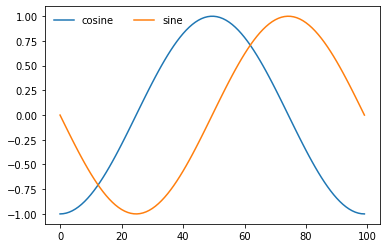

In [91]:
X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)
plt.plot(C,label='cosine')
plt.plot(S,label='sine')
plt.legend(loc='best',frameon=False,ncol=2)


#### Exercises

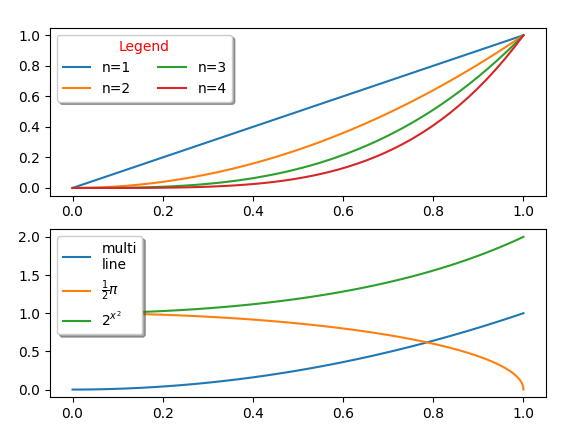

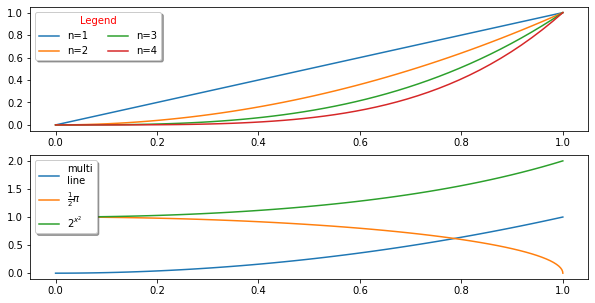

In [92]:
x=np.linspace(0,1)
fig,(ax0,ax1)=plt.subplots(2,1,figsize=(10,5))
for n in range(1,5):
  ax0.plot(x,x**n,label="n={}".format(n))
  l=ax0.legend(ncol=2,shadow=True,title='Legend',loc='upper left')
  l.get_title().set_color('red')

ax1.plot(x,x**2,label='multi\nline')
half_pi=np.linspace(0,np.pi/2)
ax1.plot(np.sin(half_pi),np.cos(half_pi),label=r"$\frac{1}{2}\pi$")
ax1.plot(x,2**(x**2),label="$2^{x^2}$")
ax1.legend(loc='upper left',shadow='True')

#### Exercise

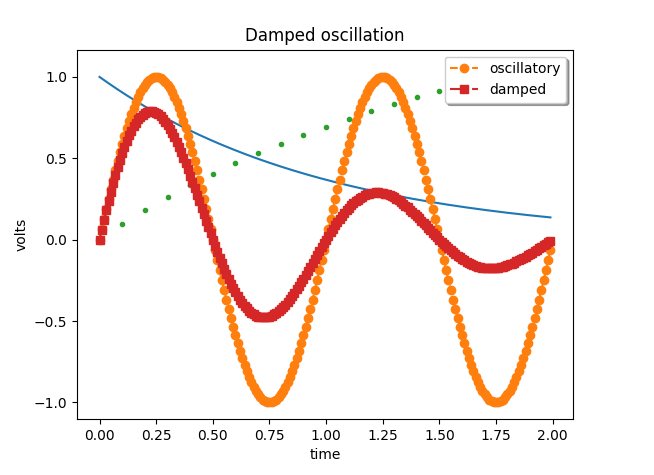

### Estilos

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [95]:
plt.style.use('seaborn-talk')

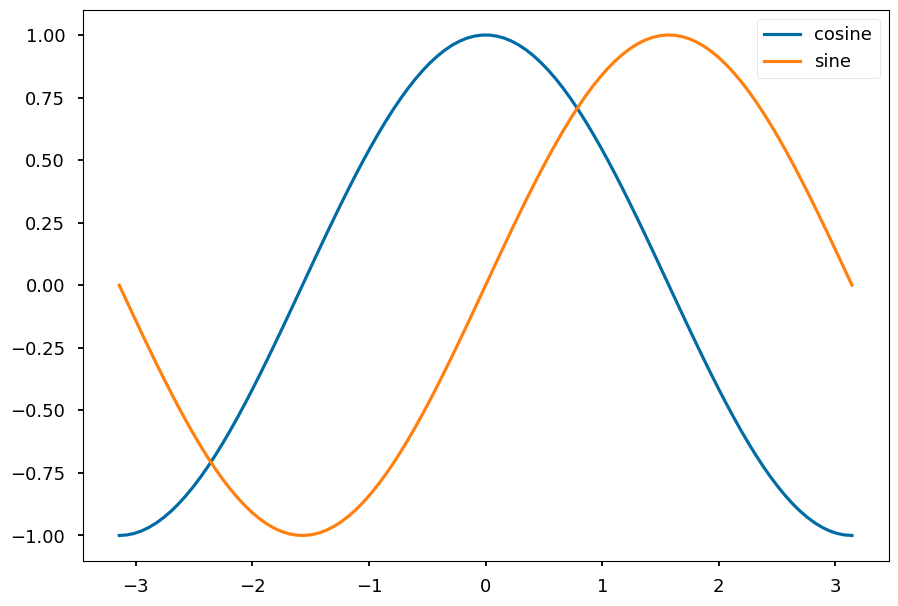

In [98]:
plt.style.use('tableau-colorblind10')
#'classic'
X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)

plt.plot(X,C,label='cosine')
plt.plot(X,S,label='sine')
plt.legend(loc='best')

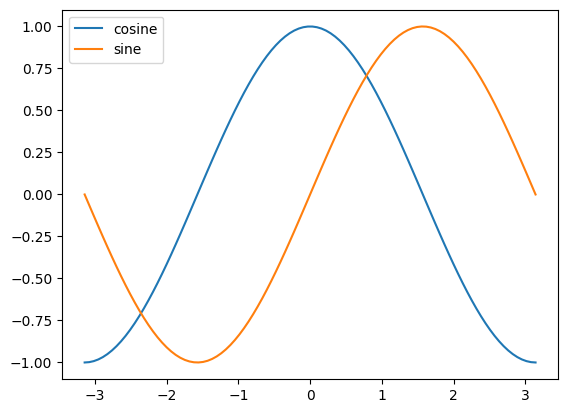

In [100]:
plt.style.use('default')

X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)

plt.plot(X,C,label='cosine')
plt.plot(X,S,label='sine')
plt.legend(loc='best')

### Configuration

matplotlibrc files holds the configuration to customize all kinds of properties in matplotlib
Using rcParams we can access these properties 

In [ ]:
import matplotlib as mp

In [ ]:
plt.style.use({'axes.linewidth': 0.8})

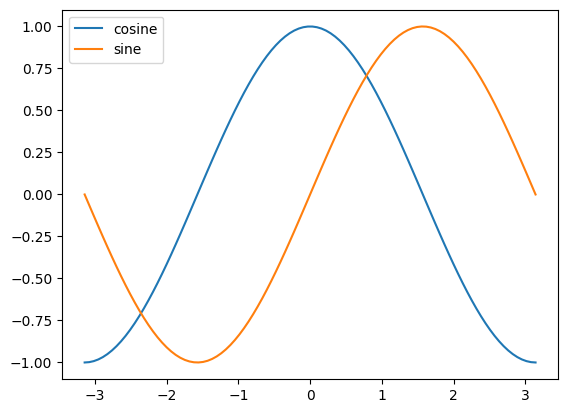

In [ ]:
X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)

plt.plot(X,C,label='cosine')
plt.plot(X,S,label='sine')
plt.legend(loc='best')

## Ticks, tick labels, limits

### Ticks

### Tick labels

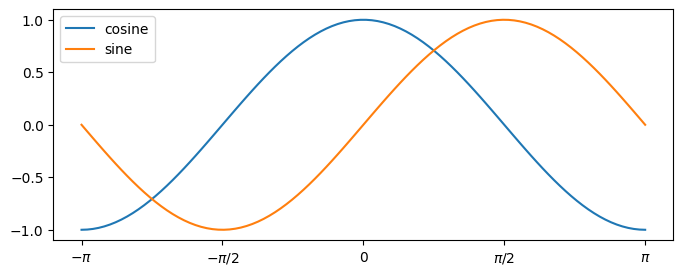

In [ ]:
X=np.linspace(-np.pi,np.pi,100)
C=np.cos(X)
S=np.sin(X)

fig,ax=plt.subplots(figsize=(8,3))
ax.plot(X,C,label='cosine')
ax.plot(X,S,label='sine')
ax.set_xticks([X[0],X[0]/2,0,X[-1]/2,X[-1]])
ax.set_xticklabels(['$-\pi$','$-\pi / 2$',0,'$\pi / 2$','$\pi$'])
ax.legend(loc='best')



### scales

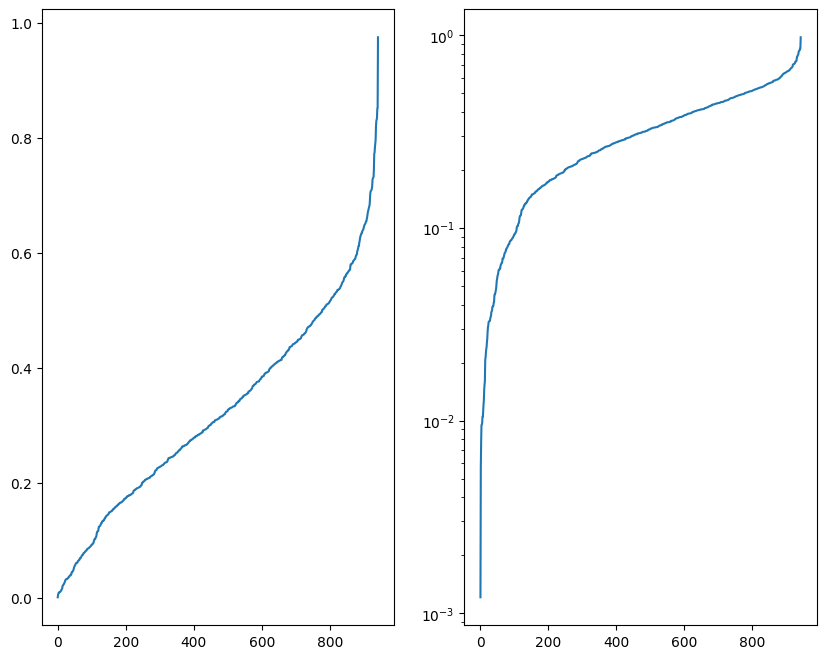

In [ ]:
y=np.random.normal(loc=0.3,scale=0.2,size=1000)
y=y[(y>0)&(y<1)]
y.sort()
x=np.arange(len(y))
fig,ax=plt.subplots(1,2,figsize=(10,8))

ax[0].plot(x,y)
ax[1].plot(x,y)
ax[1].set_yscale('log')

#### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the ``savefig()`` command.


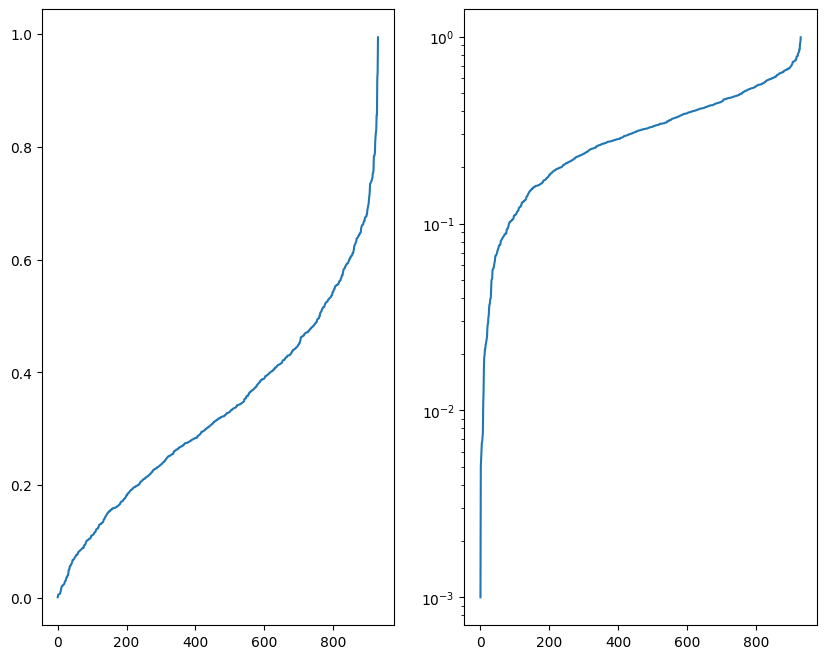

In [ ]:
y=np.random.normal(loc=0.3,scale=0.2,size=1000)
y=y[(y>0)&(y<1)]
y.sort()
x=np.arange(len(y))
fig,ax=plt.subplots(1,2,figsize=(10,8))

ax[0].plot(x,y)
ax[1].plot(x,y)
ax[1].set_yscale('log')


plt.savefig('f.png')

In [ ]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

#### Pie Chart

# Error bars

#### 3D plots

https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

The spaces between lines may not be the best solution, so we can fill the contour plot using plt.contourf()

The color steps are discrete, we can make it continuous or changing the levels or using plt.imshow() which interprets the 2-d grid of data as an image

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

### Exercise

Draw the following:


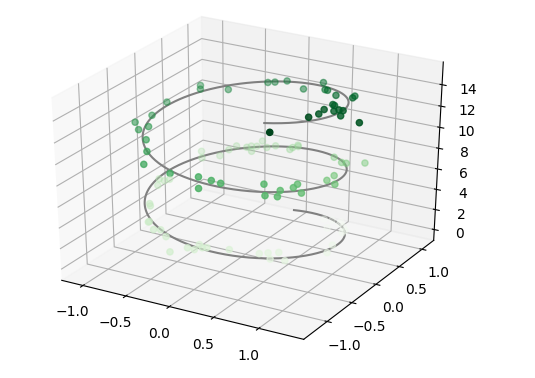

 #### Contour 3d plot 

## Other types

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

https://plotly.com/python/

## Dash

"Shiny for Python" 

https://plotly.com/dash/

# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

[Python graph gallery](https://python-graph-gallery.com/)

[Effective matplotlib](https://pbpython.com/effective-matplotlib.html)

[Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

[more plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial


# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)